In [3]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [4]:
cols = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 'fM3Long', 'fM3Trans', 'fAlpha', 'fDist', 'class']
df = pd.read_csv('magic04.data', names=cols)
df.head()

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist class  
0  40.0920   81.8828     g  
1   6.3609  205.2610     g  
2  76.9600  256.7880     g  
3  10.4490  116.7370     g  
4   4.6480  356.4620     g

In [5]:
print(df.info())
print(df.isnull().sum())
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19020 entries, 0 to 19019
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   fLength   19020 non-null  float64
 1   fWidth    19020 non-null  float64
 2   fSize     19020 non-null  float64
 3   fConc     19020 non-null  float64
 4   fConc1    19020 non-null  float64
 5   fAsym     19020 non-null  float64
 6   fM3Long   19020 non-null  float64
 7   fM3Trans  19020 non-null  float64
 8   fAlpha    19020 non-null  float64
 9   fDist     19020 non-null  float64
 10  class     19020 non-null  object 
dtypes: float64(10), object(1)
memory usage: 1.6+ MB
None
fLength     0
fWidth      0
fSize       0
fConc       0
fConc1      0
fAsym       0
fM3Long     0
fM3Trans    0
fAlpha      0
fDist       0
class       0
dtype: int64
            fLength        fWidth         fSize         fConc        fConc1  \
count  19020.000000  19020.000000  19020.000000  19020.000000  19020.000000   
m

In [6]:
print(df['class'].value_counts())
print(df['class'].unique())

class
g    12332
h     6688
Name: count, dtype: int64
['g' 'h']


In [7]:
df['class'] = df['class'].map({'g': 1, 'h': 0})
#df['class']= df[df['class']=='g'].astype(int)
print(df['class'].value_counts())

class
1    12332
0     6688
Name: count, dtype: int64


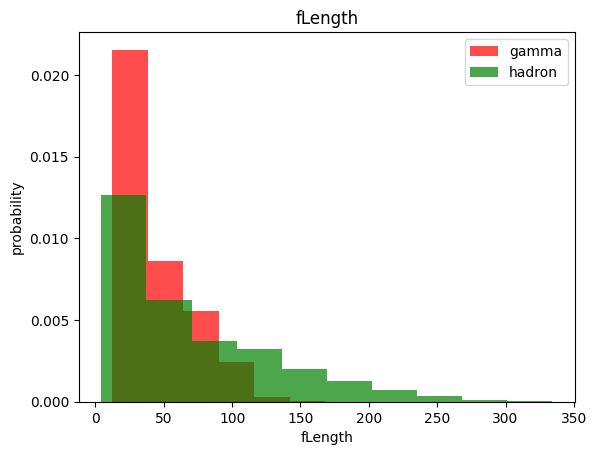

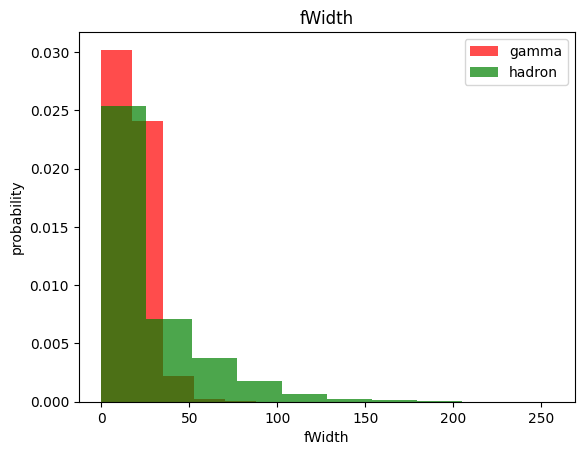

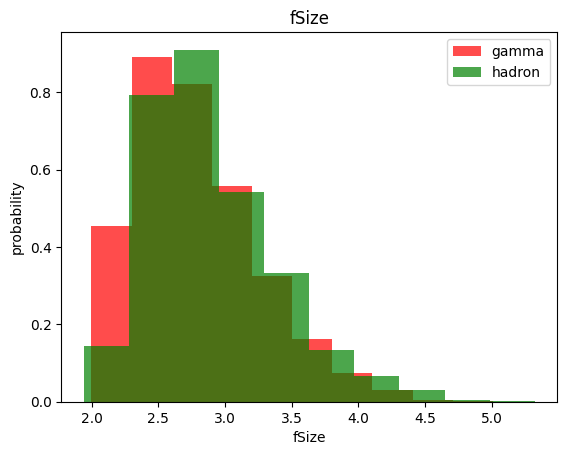

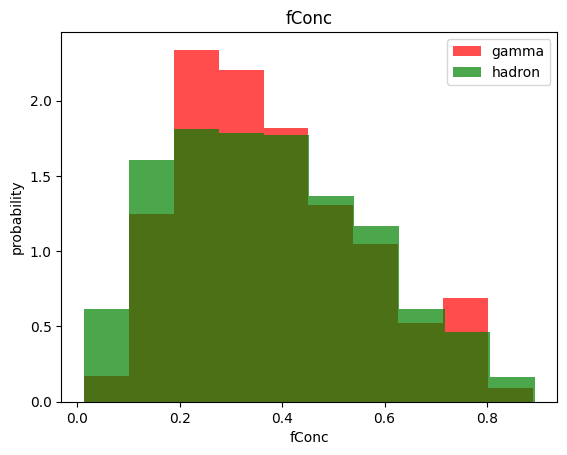

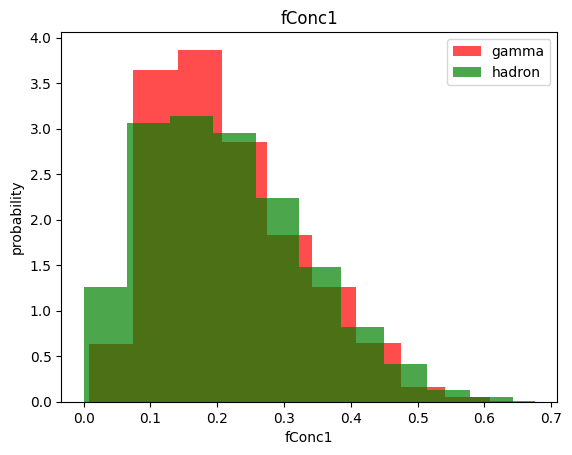

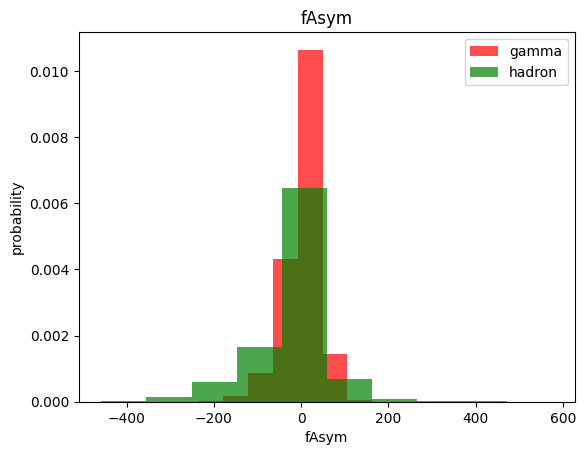

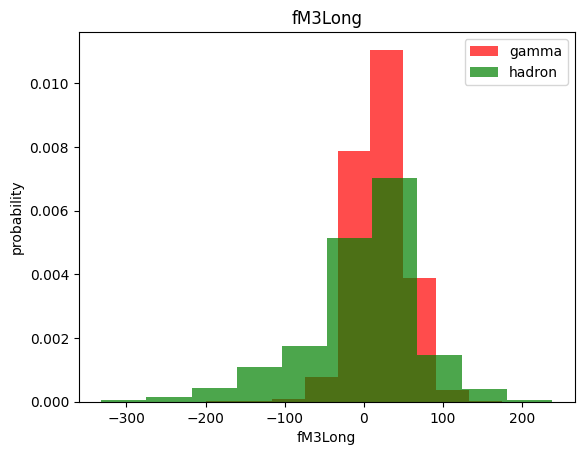

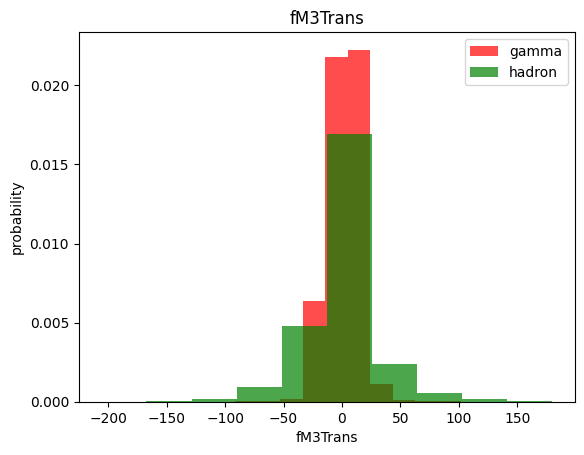

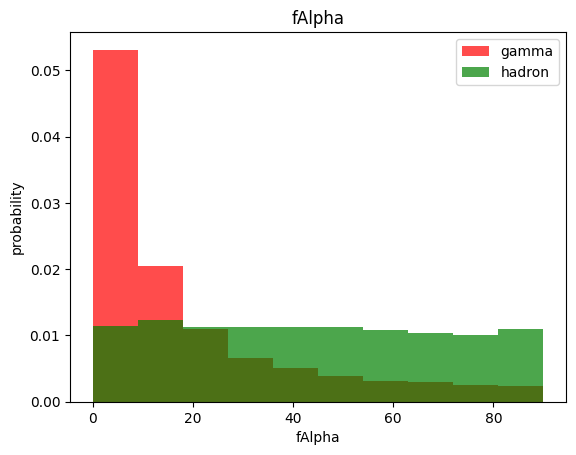

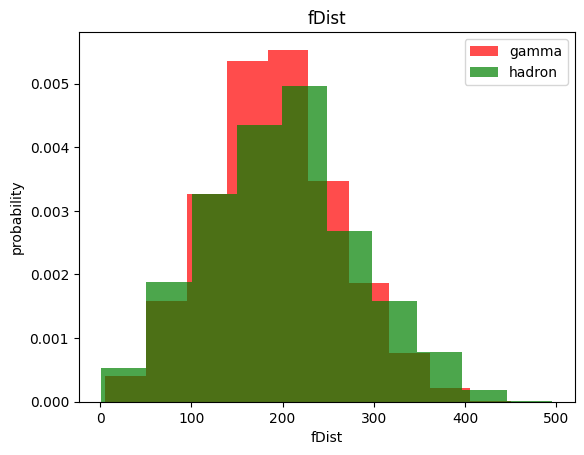

In [8]:
for label in cols[:-1]:
    plt.hist(df[df['class']==1][label],color='red', label ='gamma' , alpha=0.7 ,density=1)
    plt.hist(df[df['class']==0][label],color='green', label ='hadron' , alpha=0.7 ,density=1)
    plt.title(label)
    plt.ylabel("probability")
    plt.xlabel(label)
    plt.legend()
    plt.show()


In [9]:
df.corr(numeric_only=True)["class"]

fLength    -0.307572
fWidth     -0.265596
fSize      -0.117795
fConc       0.024615
fConc1      0.004797
fAsym       0.173587
fM3Long     0.193409
fM3Trans   -0.003837
fAlpha     -0.460979
fDist      -0.065203
class       1.000000
Name: class, dtype: float64

In [181]:
# for label in cols:
#     plt.hist(df[label], bins=20)
#     plt.title(label)
#     plt.ylabel("probability")
#     plt.xlabel(label)
#     plt.legend()
#     plt.show()

In [10]:
train ,valid ,test =np.split(df.sample(frac=1),[int(0.6*len(df)),int(0.8*len(df))])
print(train.shape,valid.shape,test.shape)

dep = (train['class'] == 1).sum()
ind =(train['class'] == 0).sum()
print(dep,ind)


(11412, 11) (3804, 11) (3804, 11)
7379 4033


/Applications/main/pyhton/.venv/lib/python3.9/site-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [11]:
def scale_dataset(df , oversample=False):
    x = df[df.columns[:-1]].values
    y = df[df.columns[-1]].values 

    scaler = StandardScaler()
    x = scaler.fit_transform(x)

    if oversample:
        ros = RandomOverSampler()
        x ,y =ros.fit_resample(x,y)

    data =np.hstack((x,np.reshape(y,(-1,1))))

    return data,x,y

In [12]:
train, x_train, y_train = scale_dataset(train, oversample=True)
valid, x_valid, y_valid = scale_dataset(valid, oversample=0)
test, x_test, y_test = scale_dataset(test, oversample=0)


/Applications/main/pyhton/.venv/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Applications/main/pyhton/.venv/lib/python3.9/site-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
/Applications/main/pyhton/.venv/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(


In [13]:
print(y_train.shape)
print((y_train==0).sum())
print((y_train==1).sum())

(14758,)
7379
7379


KNeighborsClassifier 

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

KNN_model = KNeighborsClassifier(n_neighbors=10)
KNN_model.fit(x_train,y_train)
y_pred = KNN_model.predict(x_test)

prediction_score = classification_report(y_pred,y_test)

print(prediction_score)


              precision    recall  f1-score   support

           0       0.77      0.75      0.76      1360
           1       0.86      0.87      0.87      2444

    accuracy                           0.83      3804
   macro avg       0.81      0.81      0.81      3804
weighted avg       0.83      0.83      0.83      3804



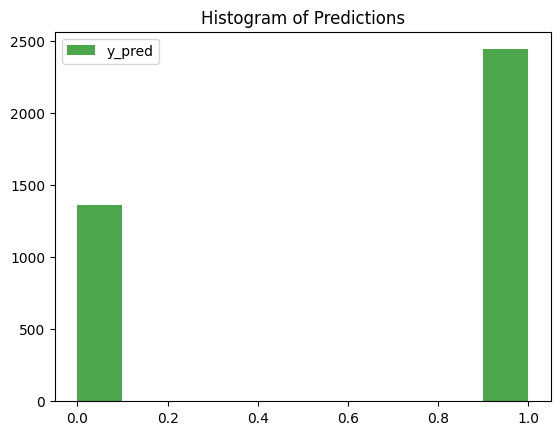

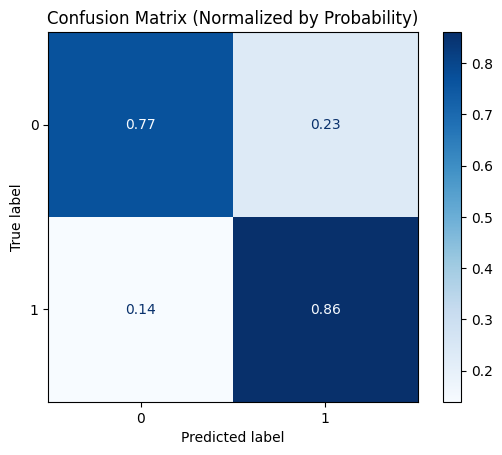

In [15]:
from sklearn.metrics import ConfusionMatrixDisplay

# First graph: Histograms for y_pred and y_test
plt.hist(y_pred, color='green', label='y_pred', alpha=0.7)
plt.legend()
plt.title("Histogram of Predictions")
plt.show()

# Second graph: Confusion Matrix

ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Blues', normalize='true')
plt.title("Confusion Matrix (Normalized by Probability)")
plt.show()


In [16]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

# Define model
nb_model = GaussianNB()

# Define parameter grid
param_grid = {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]}

# Perform Grid Search
grid_search = GridSearchCV(nb_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)

# Best parameter
print("Best var_smoothing:", grid_search.best_params_)

Best var_smoothing: {'var_smoothing': 1e-09}


In [17]:
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB(var_smoothing=1e-09)
nb_model.fit(x_train,y_train)

nb_y_pred = nb_model.predict(x_test)

nb_prediction_score = classification_report(nb_y_pred,y_test)

print(nb_prediction_score)


              precision    recall  f1-score   support

           0       0.39      0.65      0.49       789
           1       0.89      0.73      0.80      3015

    accuracy                           0.72      3804
   macro avg       0.64      0.69      0.65      3804
weighted avg       0.79      0.72      0.74      3804



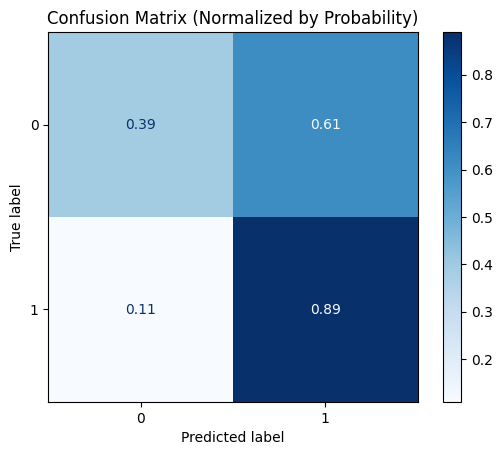

In [18]:

ConfusionMatrixDisplay.from_predictions(y_test,nb_y_pred, cmap='Blues', normalize='true')
plt.title("Confusion Matrix (Normalized by Probability)")
plt.show()

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(LogisticRegression(solver='liblinear'), param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)

print("Best C:", grid_search.best_params_)

Best C: {'C': 0.01}


In [20]:
from sklearn.linear_model import LogisticRegression

lg_model = LogisticRegression(penalty='l2', solver='liblinear', C=0.01, max_iter=100)
lg_model.fit(x_train,y_train)

lg_y_pred = lg_model.predict(x_test)

lg_prediction_score = classification_report(lg_y_pred,y_test)

print(lg_prediction_score)


              precision    recall  f1-score   support

           0       0.73      0.69      0.71      1399
           1       0.83      0.85      0.84      2405

    accuracy                           0.79      3804
   macro avg       0.78      0.77      0.77      3804
weighted avg       0.79      0.79      0.79      3804



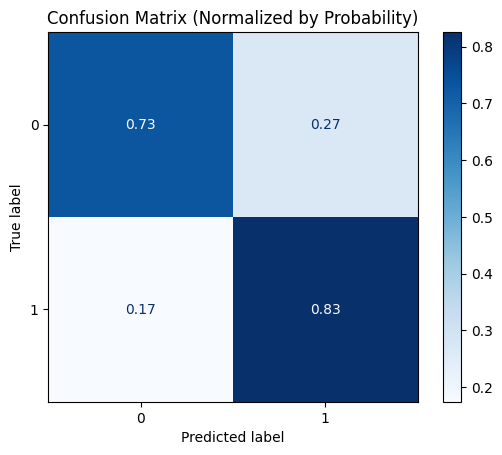

In [21]:
ConfusionMatrixDisplay.from_predictions(y_test,lg_y_pred, cmap='Blues', normalize='true')
plt.title("Confusion Matrix (Normalized by Probability)")
plt.show()

In [24]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(SVC(kernel='rbf'), param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)

print("Best C:", grid_search.best_params_)

Best C: {'C': 100}


In [198]:
param_grid = {'gamma': [0.001, 0.01, 0.1, 1, 10]}
grid_search = GridSearchCV(SVC(kernel='rbf', C=1), param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)

print("Best gamma:", grid_search.best_params_)

Best gamma: {'gamma': 10}


In [26]:
from sklearn.svm import SVC

svc_model = SVC()

svc_model.fit(x_train,y_train)

svc_y_pred = svc_model.predict(x_test)

svc_prediction_score = classification_report(svc_y_pred,y_test)

print(svc_prediction_score)

              precision    recall  f1-score   support

           0       0.81      0.83      0.82      1294
           1       0.91      0.90      0.90      2510

    accuracy                           0.87      3804
   macro avg       0.86      0.86      0.86      3804
weighted avg       0.87      0.87      0.87      3804



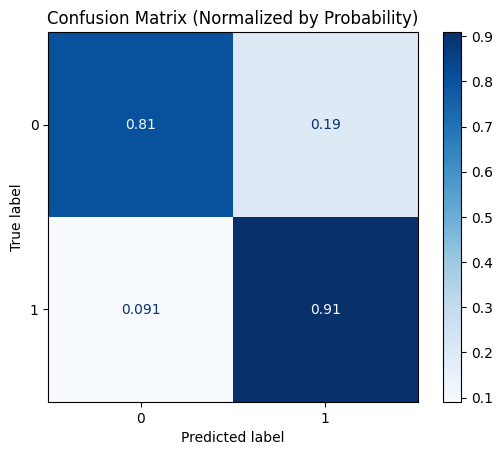

In [27]:
ConfusionMatrixDisplay.from_predictions(y_test,svc_y_pred, cmap='Blues', normalize='true')
plt.title("Confusion Matrix (Normalized by Probability)")
plt.show()

In [28]:
import tensorflow as tf

/Applications/main/pyhton/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [29]:
def plot_history(history):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
  ax1.plot(history.history['loss'], label='loss')
  ax1.plot(history.history['val_loss'], label='val_loss')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Binary crossentropy')
  ax1.grid(True)

  ax2.plot(history.history['accuracy'], label='accuracy')
  ax2.plot(history.history['val_accuracy'], label='val_accuracy')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Accuracy')
  ax2.grid(True)

  plt.show()

In [32]:
def train_model(x_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs):
  nn_model = tf.keras.Sequential([
      tf.keras.layers.Dense(num_nodes, activation='relu', input_shape=(10,)),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(num_nodes, activation='relu'),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(1, activation='sigmoid')
  ])

  nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr), loss='binary_crossentropy',
                  metrics=['accuracy'])
  history = nn_model.fit(
    x_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=0
  )

  return nn_model, history

16 nodes, dropout 0, lr 0.01, batch size 32


/Applications/main/pyhton/.venv/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


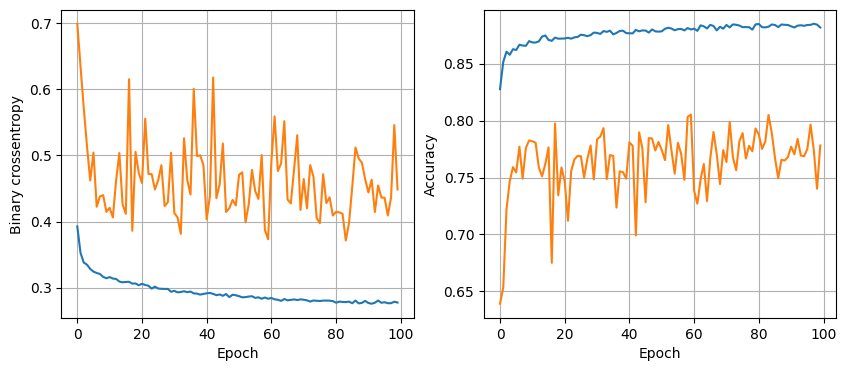

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8648 - loss: 0.3326  
16 nodes, dropout 0, lr 0.01, batch size 64


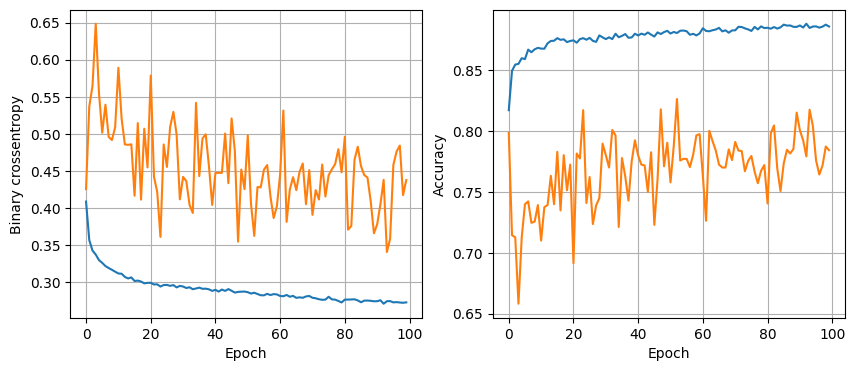

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8699 - loss: 0.3241  
16 nodes, dropout 0, lr 0.01, batch size 128


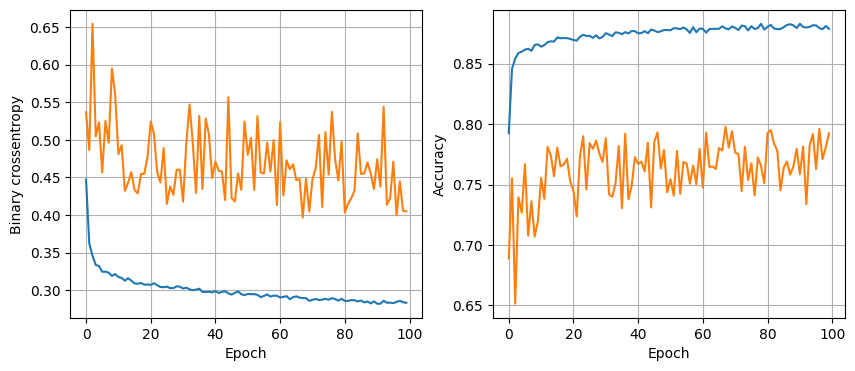

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8614 - loss: 0.3254  
16 nodes, dropout 0, lr 0.005, batch size 32


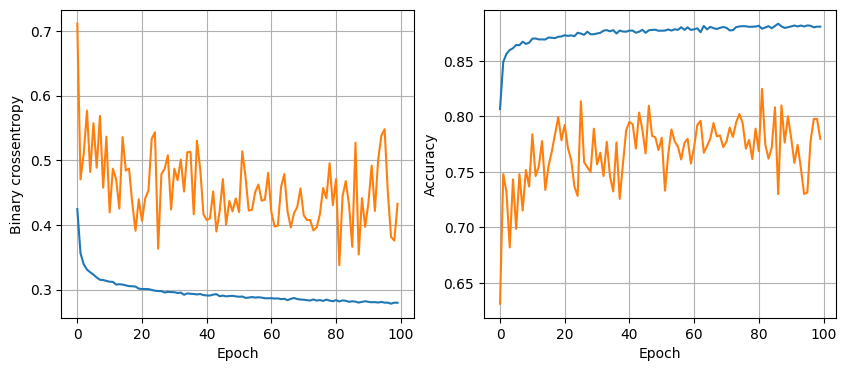

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 973us/step - accuracy: 0.8671 - loss: 0.3138
16 nodes, dropout 0, lr 0.005, batch size 64


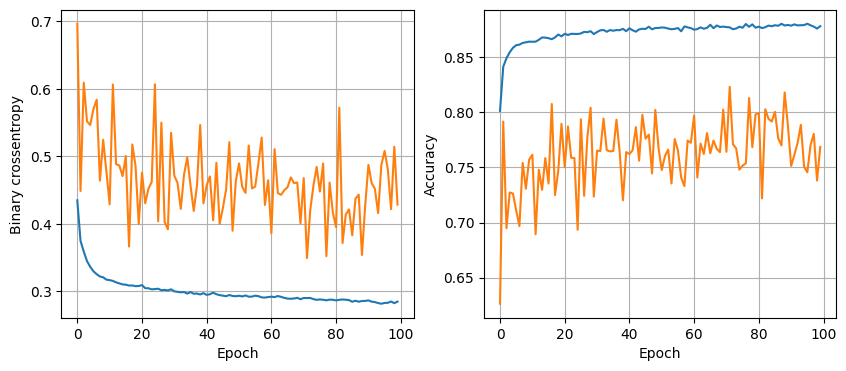

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8697 - loss: 0.3113  
16 nodes, dropout 0, lr 0.005, batch size 128


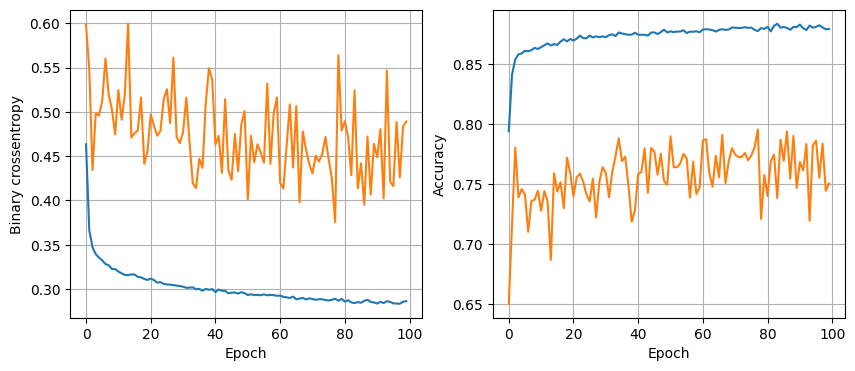

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 971us/step - accuracy: 0.8765 - loss: 0.3134
16 nodes, dropout 0, lr 0.001, batch size 32


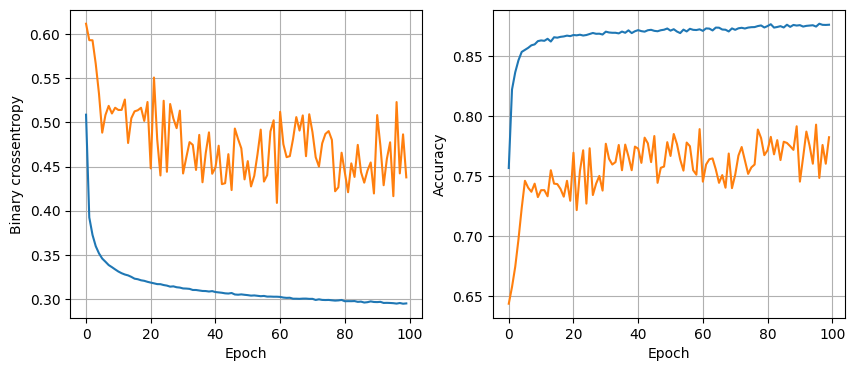

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8677 - loss: 0.3149  
16 nodes, dropout 0, lr 0.001, batch size 64


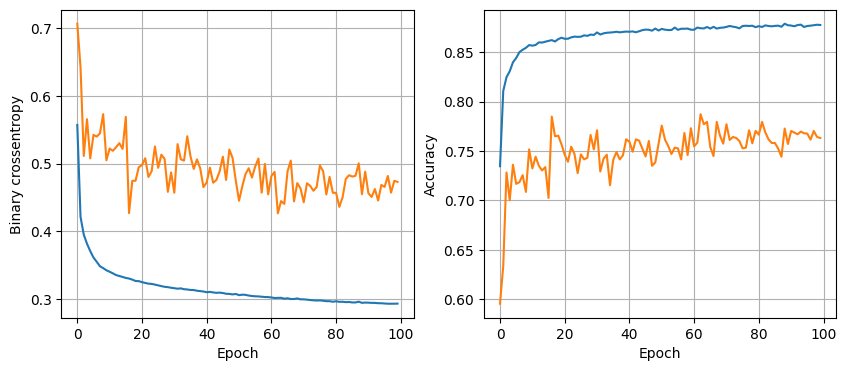

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8626 - loss: 0.3131  
16 nodes, dropout 0, lr 0.001, batch size 128


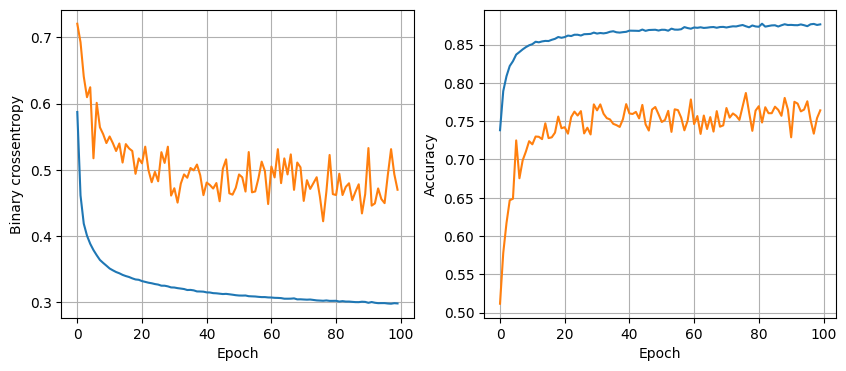

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 968us/step - accuracy: 0.8617 - loss: 0.3124
16 nodes, dropout 0.2, lr 0.01, batch size 32


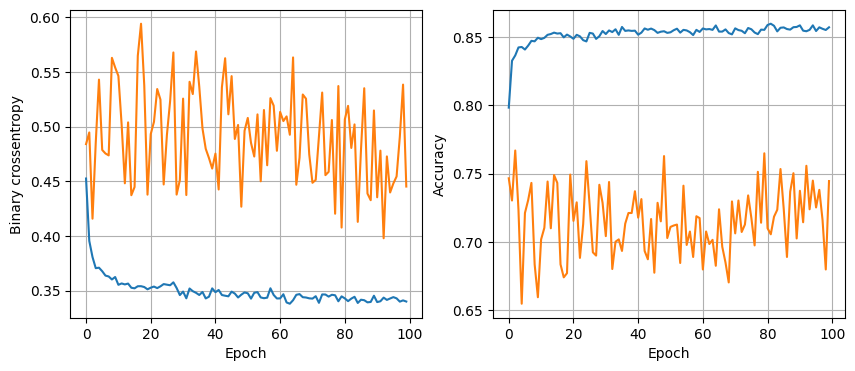

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8742 - loss: 0.3098  
16 nodes, dropout 0.2, lr 0.01, batch size 64


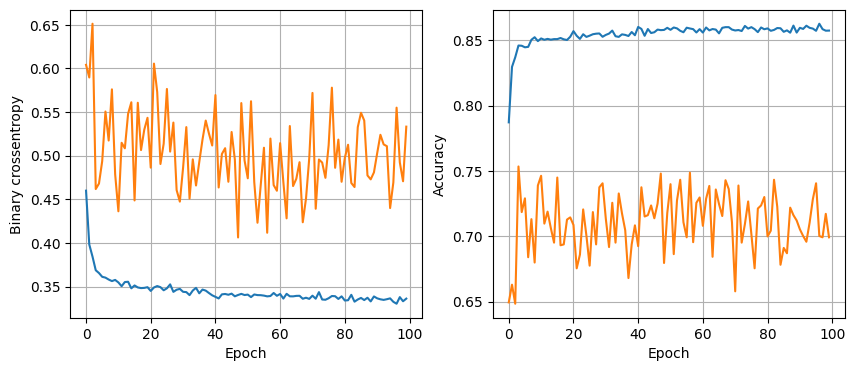

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8644 - loss: 0.3196  
16 nodes, dropout 0.2, lr 0.01, batch size 128


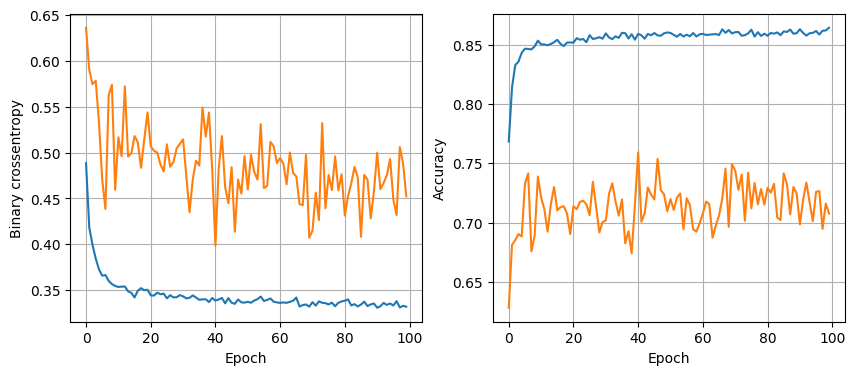

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8702 - loss: 0.3221  
16 nodes, dropout 0.2, lr 0.005, batch size 32


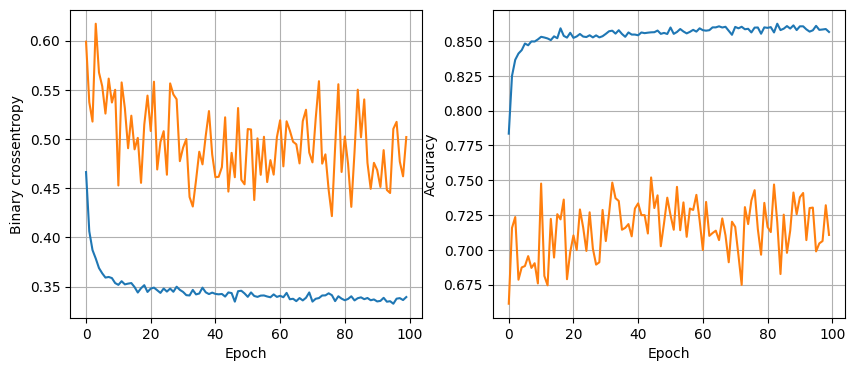

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8682 - loss: 0.3186
16 nodes, dropout 0.2, lr 0.005, batch size 64


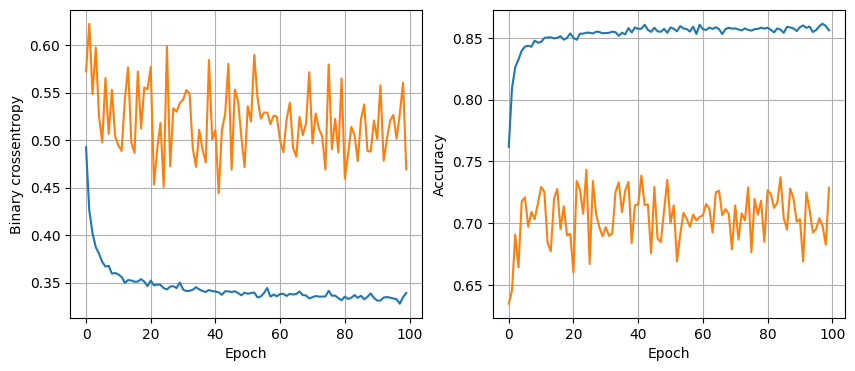

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8688 - loss: 0.3103  
16 nodes, dropout 0.2, lr 0.005, batch size 128


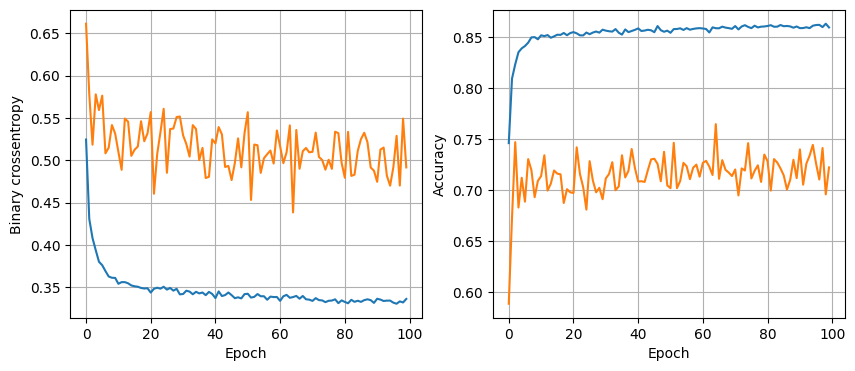

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8753 - loss: 0.3032  
16 nodes, dropout 0.2, lr 0.001, batch size 32


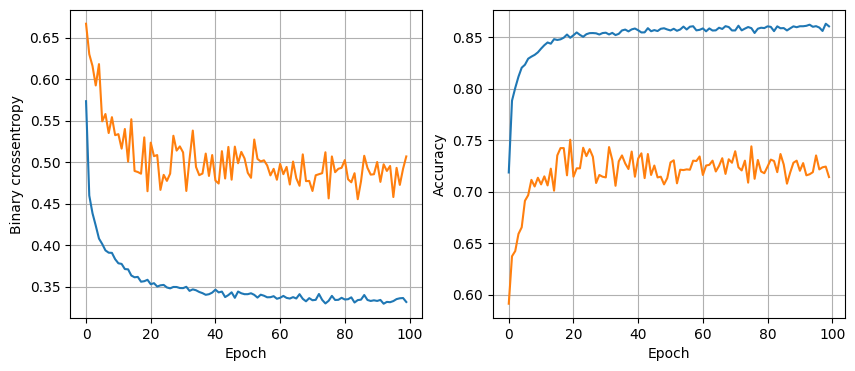

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8733 - loss: 0.3116  
16 nodes, dropout 0.2, lr 0.001, batch size 64


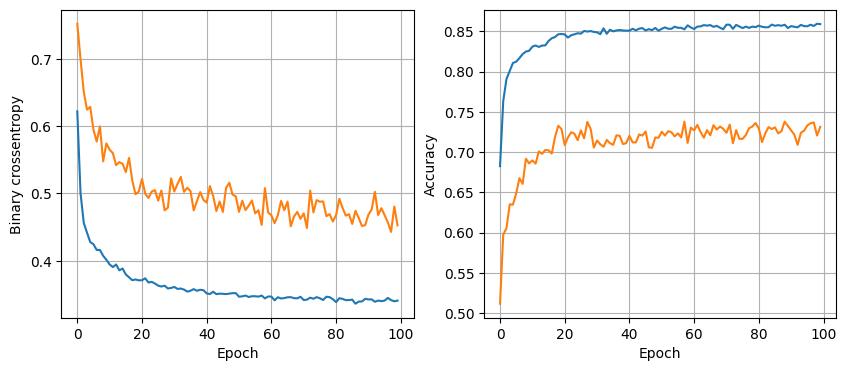

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8659 - loss: 0.3232  
16 nodes, dropout 0.2, lr 0.001, batch size 128


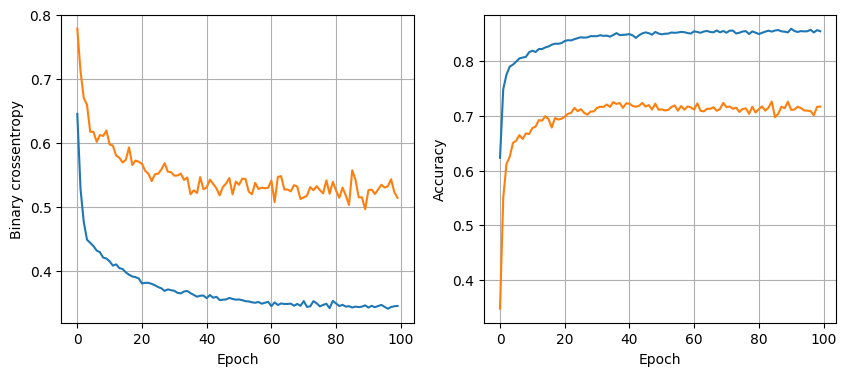

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 999us/step - accuracy: 0.8645 - loss: 0.3174
32 nodes, dropout 0, lr 0.01, batch size 32


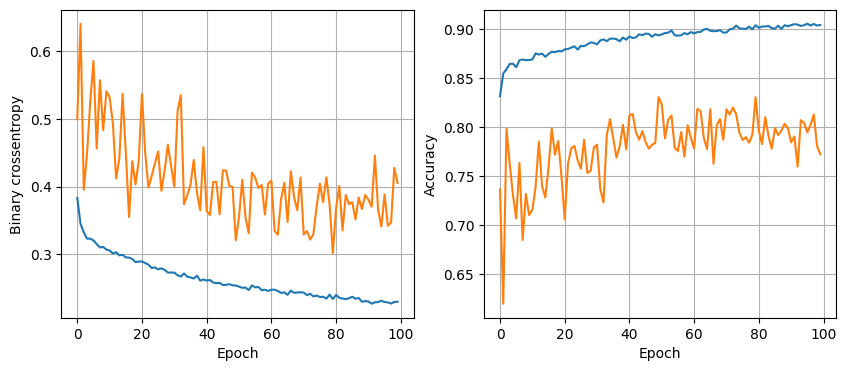

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8555 - loss: 0.3793  
32 nodes, dropout 0, lr 0.01, batch size 64


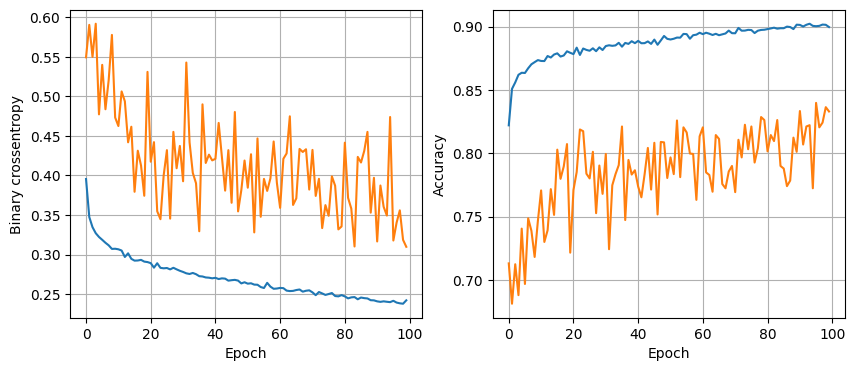

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8704 - loss: 0.3414  
32 nodes, dropout 0, lr 0.01, batch size 128


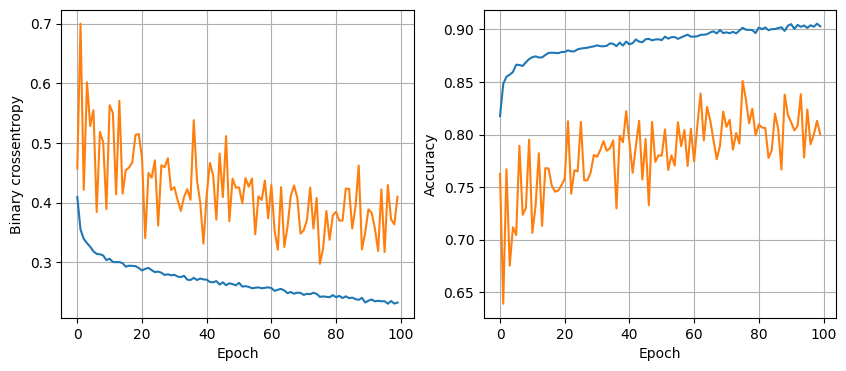

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8555 - loss: 0.3713  
32 nodes, dropout 0, lr 0.005, batch size 32


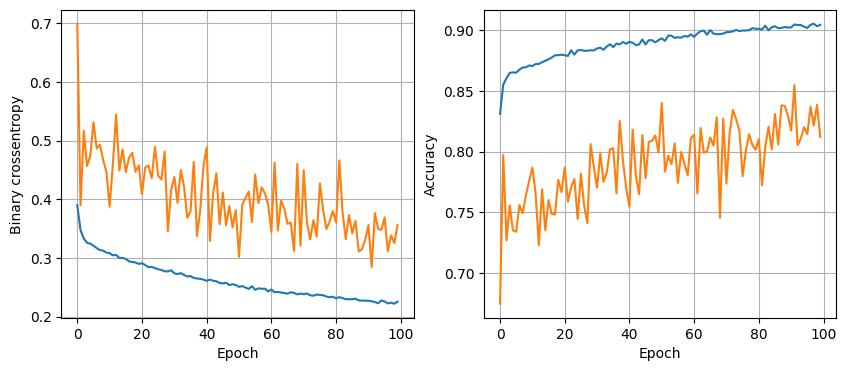

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8592 - loss: 0.3832  
32 nodes, dropout 0, lr 0.005, batch size 64


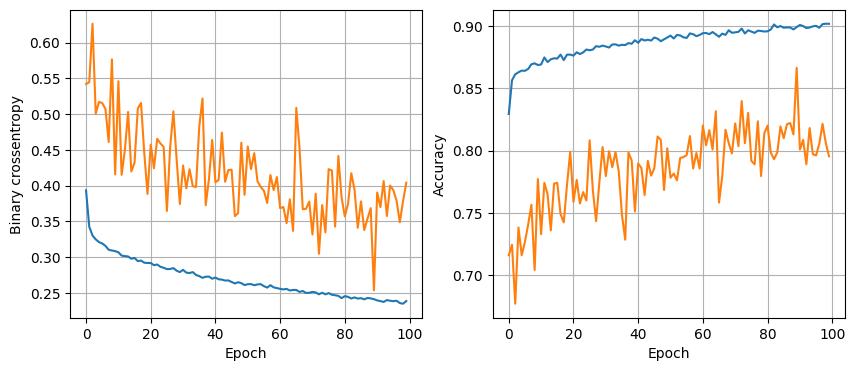

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8581 - loss: 0.3674  
32 nodes, dropout 0, lr 0.005, batch size 128


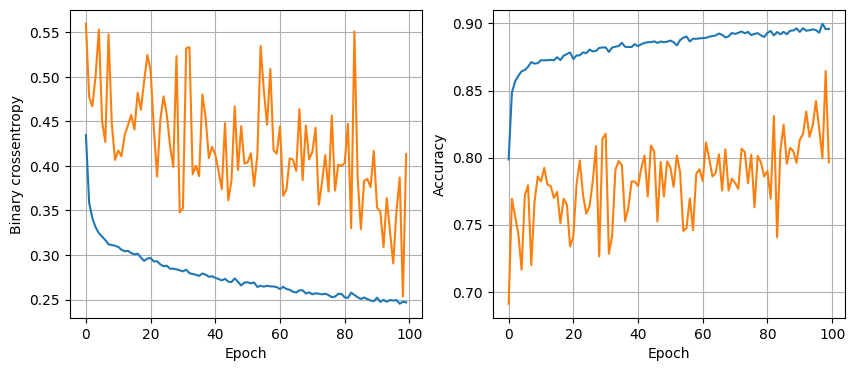

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8610 - loss: 0.3410  
32 nodes, dropout 0, lr 0.001, batch size 32


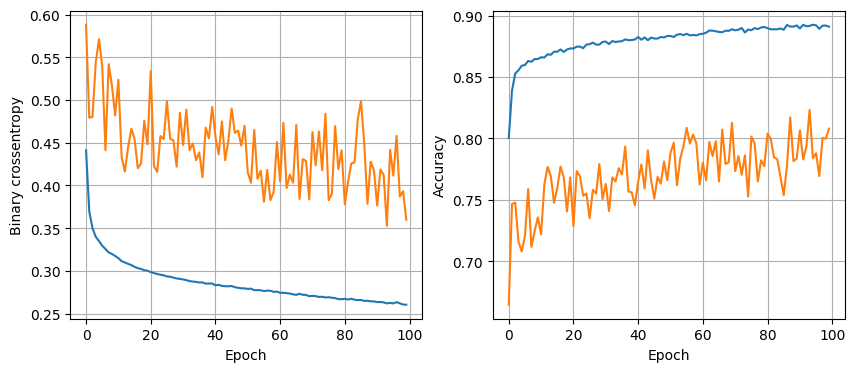

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8710 - loss: 0.3218  
32 nodes, dropout 0, lr 0.001, batch size 64


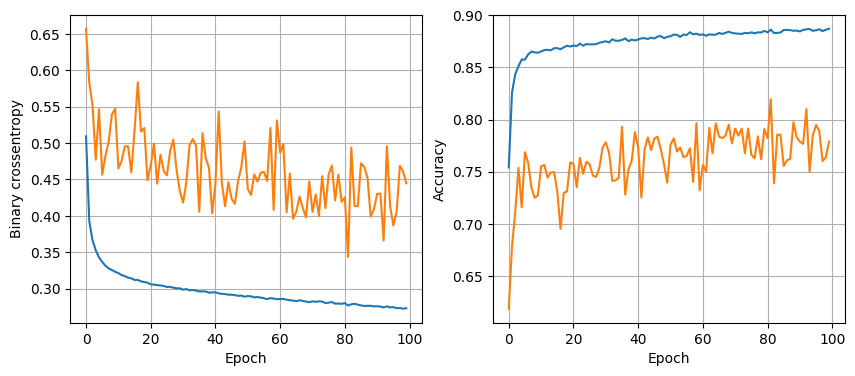

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8687 - loss: 0.3065  
32 nodes, dropout 0, lr 0.001, batch size 128


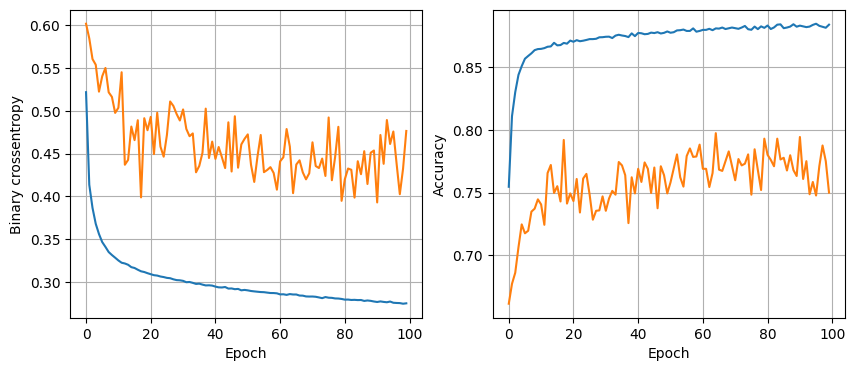

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8703 - loss: 0.3178  
32 nodes, dropout 0.2, lr 0.01, batch size 32


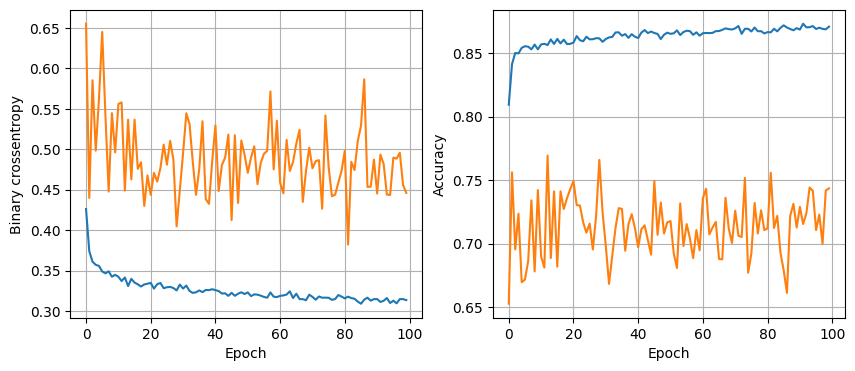

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8724 - loss: 0.3098  
32 nodes, dropout 0.2, lr 0.01, batch size 64


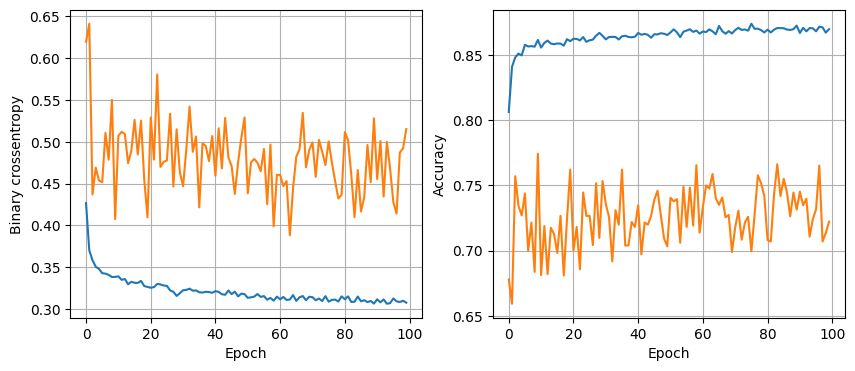

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8650 - loss: 0.3178  
32 nodes, dropout 0.2, lr 0.01, batch size 128


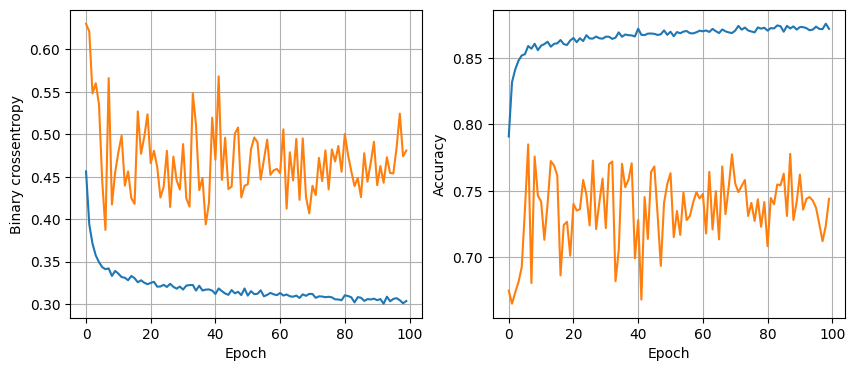

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8717 - loss: 0.3101  
32 nodes, dropout 0.2, lr 0.005, batch size 32


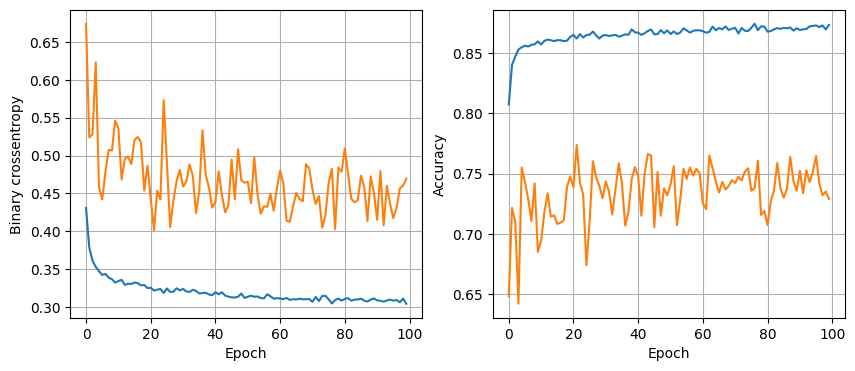

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8716 - loss: 0.3125  
32 nodes, dropout 0.2, lr 0.005, batch size 64


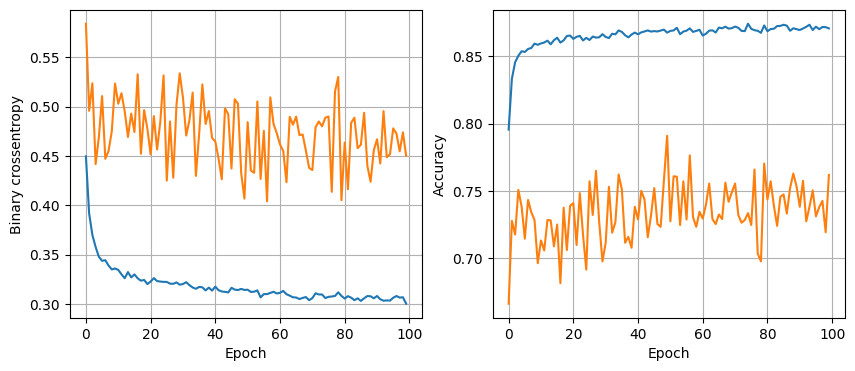

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8729 - loss: 0.3046
32 nodes, dropout 0.2, lr 0.005, batch size 128


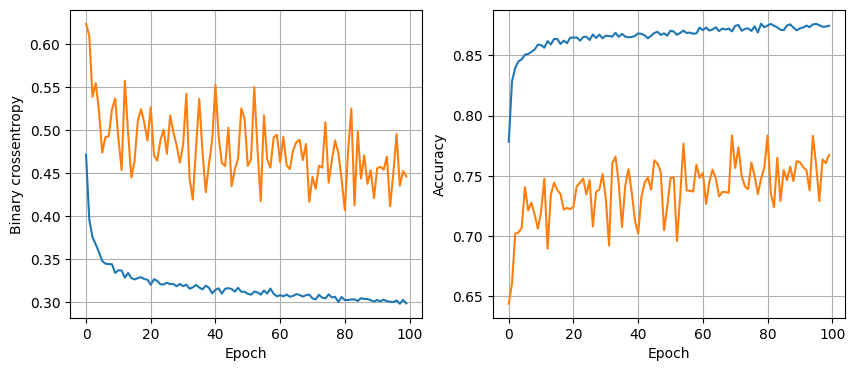

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8731 - loss: 0.3030  
32 nodes, dropout 0.2, lr 0.001, batch size 32


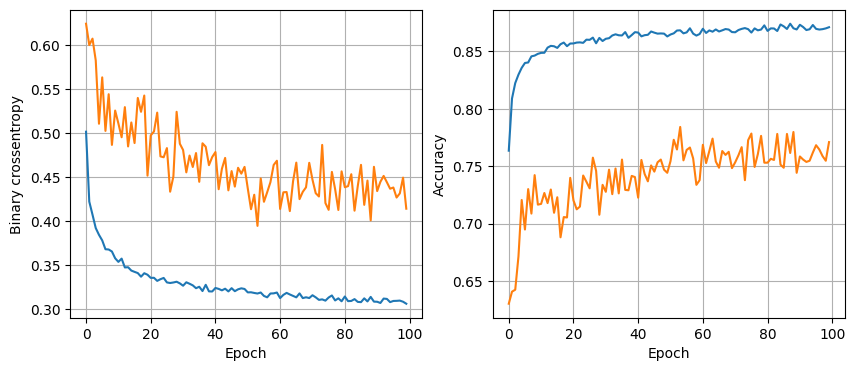

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8748 - loss: 0.3062  
32 nodes, dropout 0.2, lr 0.001, batch size 64


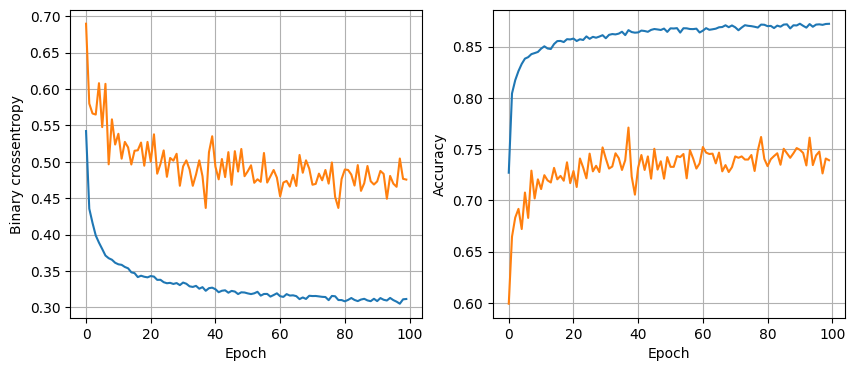

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8770 - loss: 0.3029  
32 nodes, dropout 0.2, lr 0.001, batch size 128


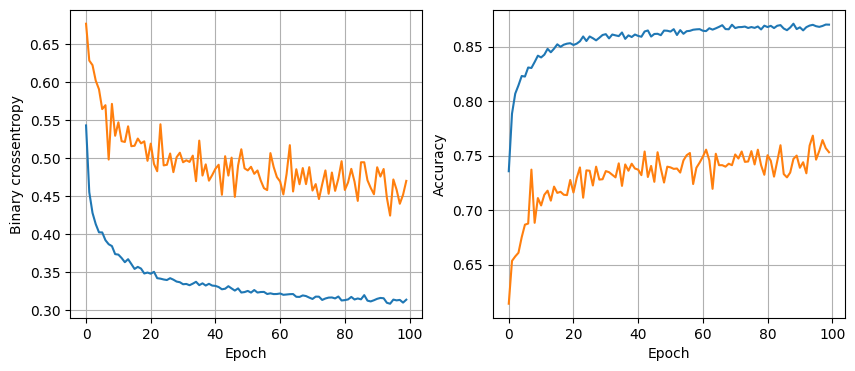

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8730 - loss: 0.3055  
64 nodes, dropout 0, lr 0.01, batch size 32


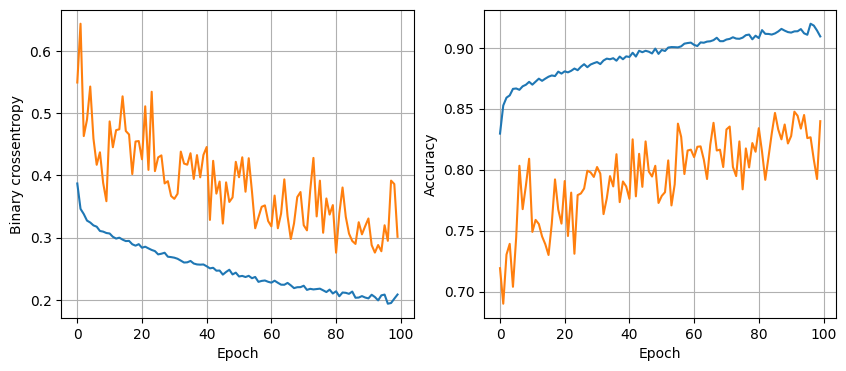

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8672 - loss: 0.4588
64 nodes, dropout 0, lr 0.01, batch size 64


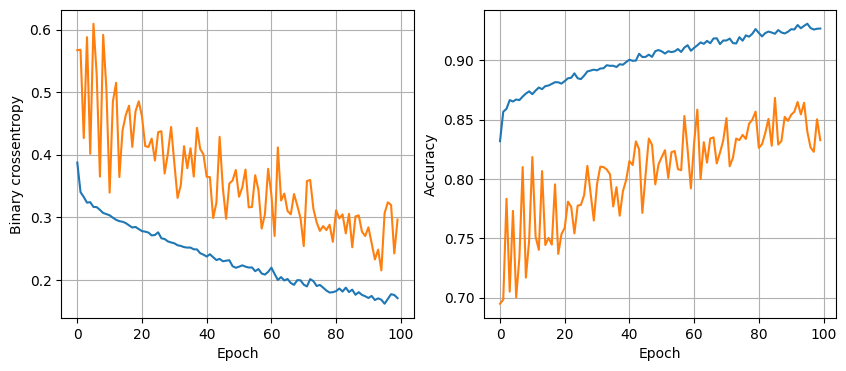

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8555 - loss: 0.5809  
64 nodes, dropout 0, lr 0.01, batch size 128


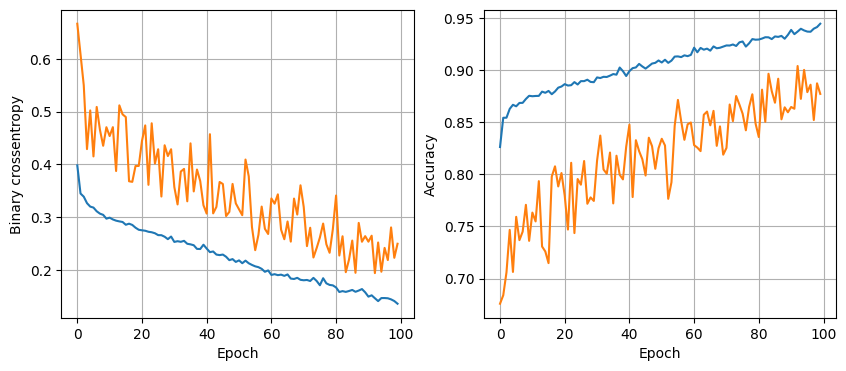

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8594 - loss: 0.5406
64 nodes, dropout 0, lr 0.005, batch size 32


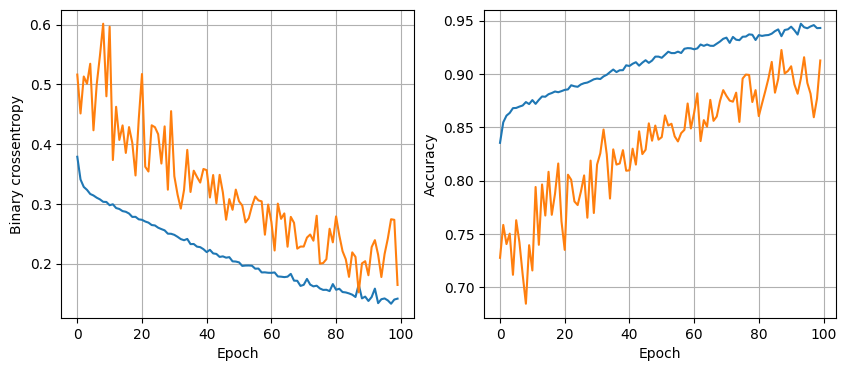

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8428 - loss: 0.6099
64 nodes, dropout 0, lr 0.005, batch size 64


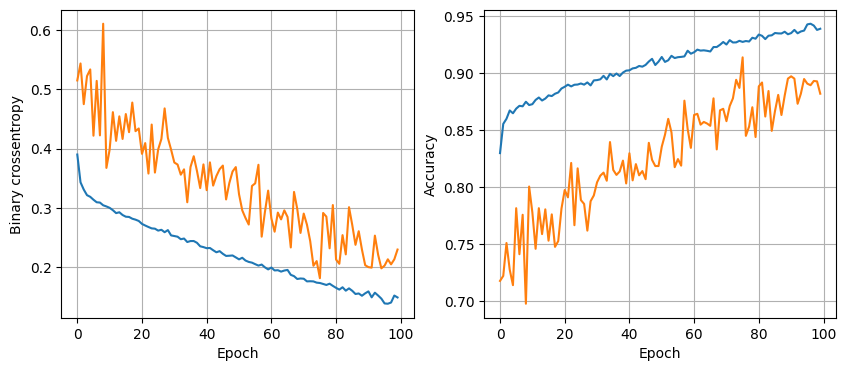

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8507 - loss: 0.5388
64 nodes, dropout 0, lr 0.005, batch size 128


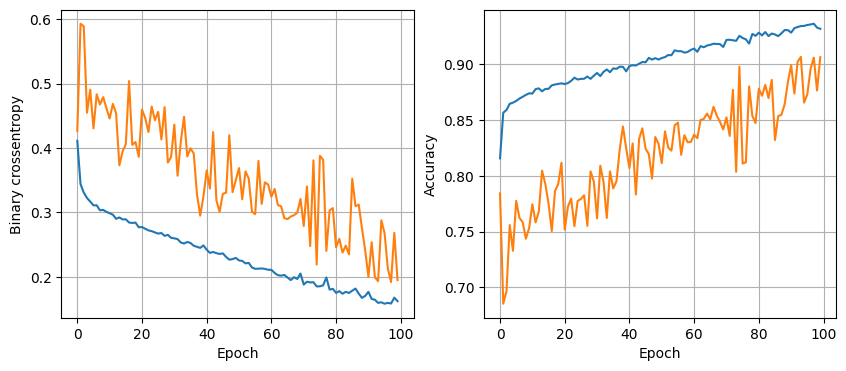

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8583 - loss: 0.4578  
64 nodes, dropout 0, lr 0.001, batch size 32


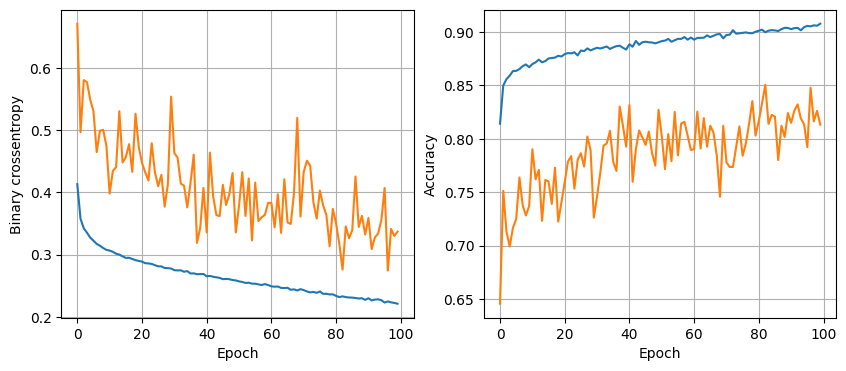

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8666 - loss: 0.3546
64 nodes, dropout 0, lr 0.001, batch size 64


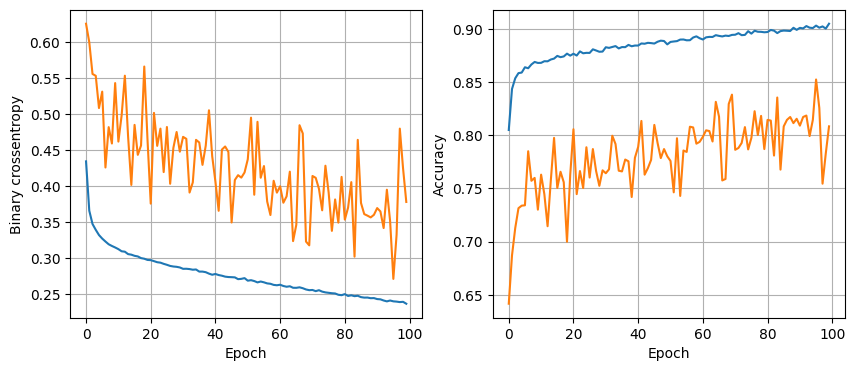

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8714 - loss: 0.3295
64 nodes, dropout 0, lr 0.001, batch size 128


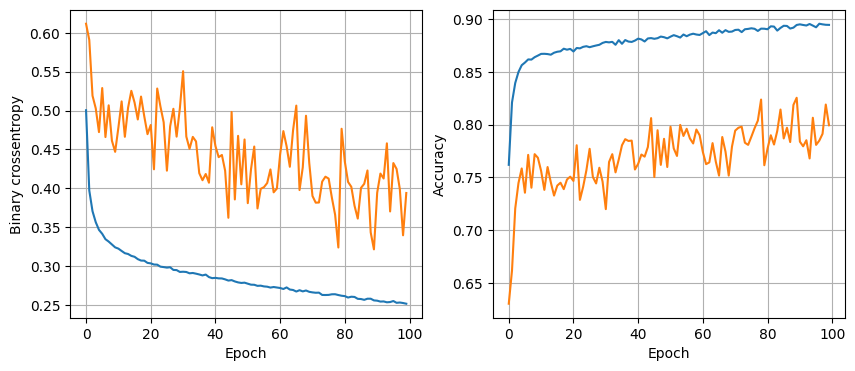

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8695 - loss: 0.3129  
64 nodes, dropout 0.2, lr 0.01, batch size 32


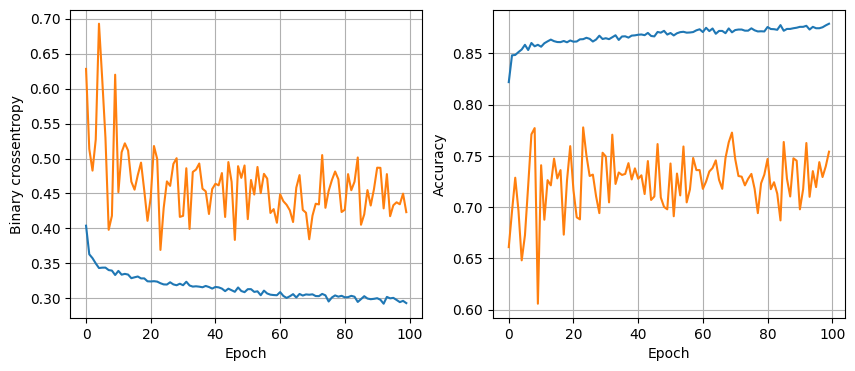

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8647 - loss: 0.3035  
64 nodes, dropout 0.2, lr 0.01, batch size 64


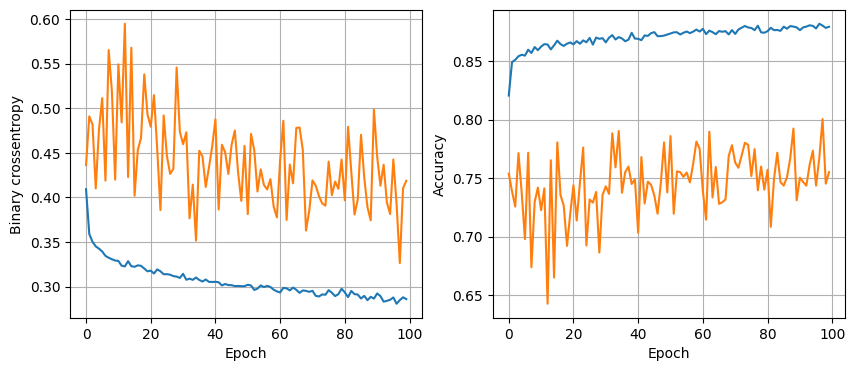

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8712 - loss: 0.3131  
64 nodes, dropout 0.2, lr 0.01, batch size 128


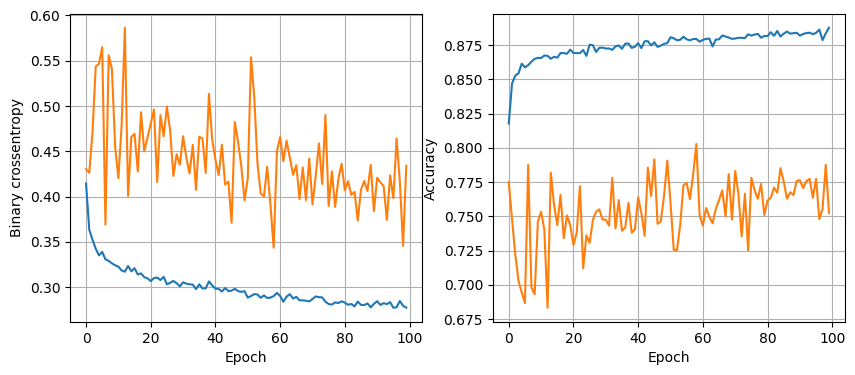

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8737 - loss: 0.3173  
64 nodes, dropout 0.2, lr 0.005, batch size 32


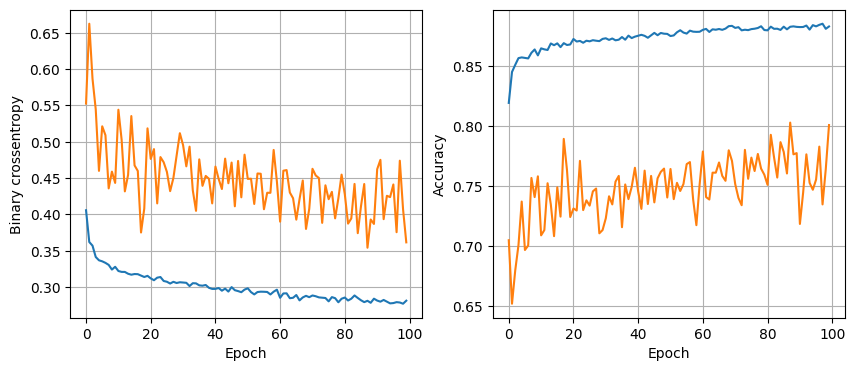

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8734 - loss: 0.3051
64 nodes, dropout 0.2, lr 0.005, batch size 64


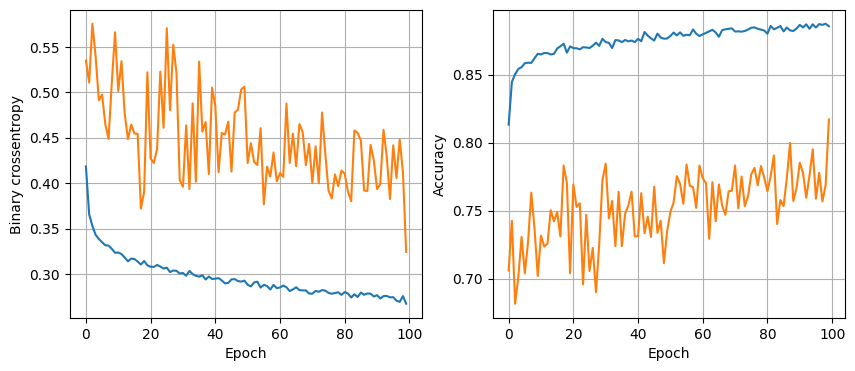

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8731 - loss: 0.3083
64 nodes, dropout 0.2, lr 0.005, batch size 128


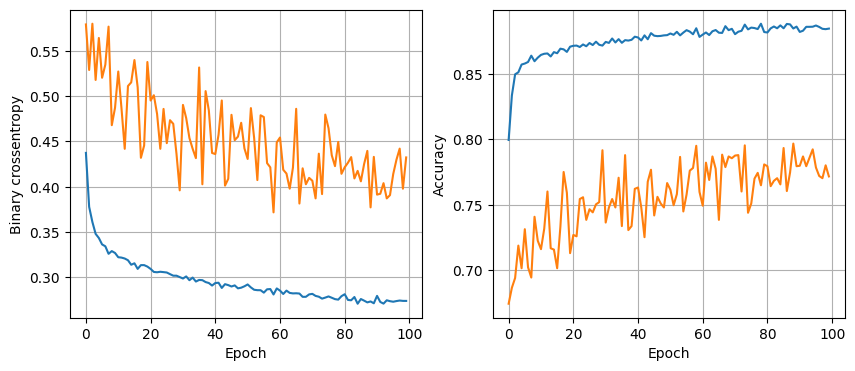

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8736 - loss: 0.3072
64 nodes, dropout 0.2, lr 0.001, batch size 32


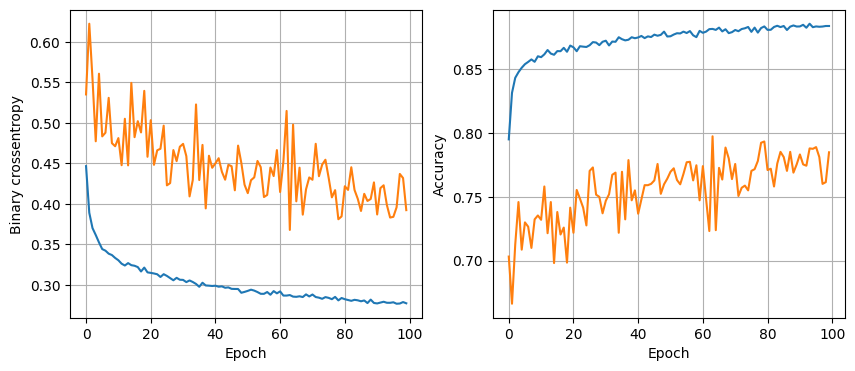

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8782 - loss: 0.2952
64 nodes, dropout 0.2, lr 0.001, batch size 64


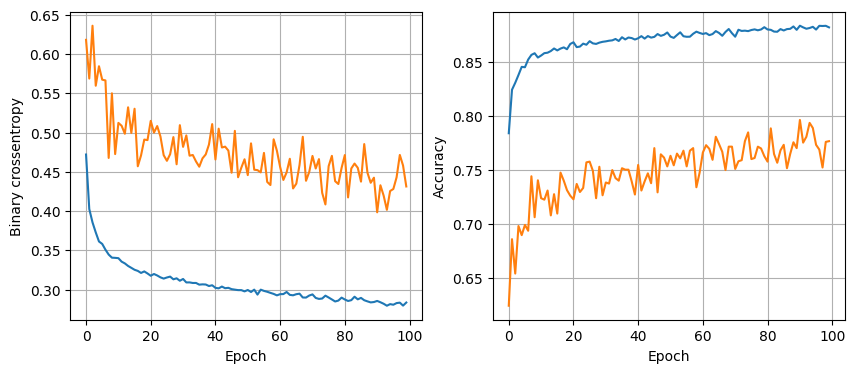

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8798 - loss: 0.2939  
64 nodes, dropout 0.2, lr 0.001, batch size 128


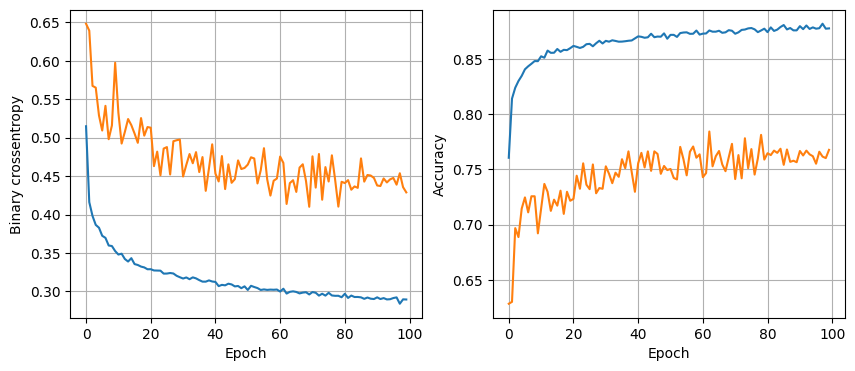

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8753 - loss: 0.2962


In [33]:
least_val_loss = float('inf')
least_loss_model = None
epochs=100
for num_nodes in [16, 32, 64]:
  for dropout_prob in[0, 0.2]:
    for lr in [0.01, 0.005, 0.001]:
      for batch_size in [32, 64, 128]:
        print(f"{num_nodes} nodes, dropout {dropout_prob}, lr {lr}, batch size {batch_size}")
        model, history = train_model(x_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs)
        plot_history(history)
        val_loss = model.evaluate(x_valid, y_valid)[0]
        if val_loss < least_val_loss:
          least_val_loss = val_loss
          least_loss_model = model

In [34]:
y_pred = least_loss_model.predict(x_test)
y_pred = (y_pred > 0.5).astype(int).reshape(-1,)
print(classification_report(y_test, y_pred))

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 953us/step
              precision    recall  f1-score   support

           0       0.89      0.76      0.82      1326
           1       0.88      0.95      0.91      2478

    accuracy                           0.88      3804
   macro avg       0.88      0.85      0.87      3804
weighted avg       0.88      0.88      0.88      3804



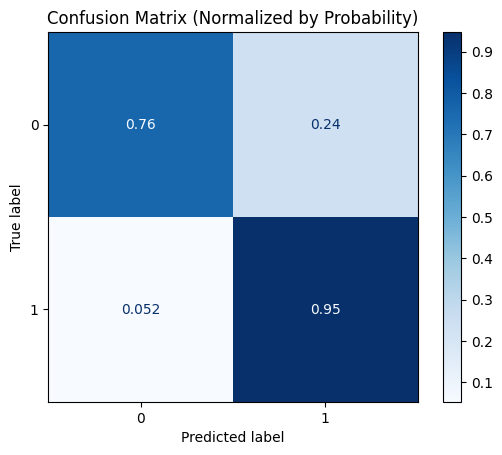

In [35]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred, cmap='Blues', normalize='true')
plt.title("Confusion Matrix (Normalized by Probability)")
plt.show()